## Downloading the data

In [1]:
!wget "http://aws-proserve-data-science.s3.amazonaws.com/geological_similarity.zip"


--2020-03-21 16:45:09--  http://aws-proserve-data-science.s3.amazonaws.com/geological_similarity.zip
Resolving aws-proserve-data-science.s3.amazonaws.com (aws-proserve-data-science.s3.amazonaws.com)... 52.218.229.155
Connecting to aws-proserve-data-science.s3.amazonaws.com (aws-proserve-data-science.s3.amazonaws.com)|52.218.229.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35312590 (34M) [application/zip]
Saving to: ‘geological_similarity.zip’

geological_similari 100%[===================>]  33.68M  12.0MB/s    in 2.8s    

2020-03-21 16:45:12 (12.0 MB/s) - ‘geological_similarity.zip’ saved [35312590/35312590]



## Unzipping the data

In [2]:
!unzip geological_similarity.zip

Streaming output truncated to the last 5000 lines.
  inflating: geological_similarity/schist/00DLL.jpg  
  inflating: geological_similarity/schist/00GOR.jpg  
  inflating: geological_similarity/schist/00TOX.jpg  
  inflating: geological_similarity/schist/014BQ.jpg  
  inflating: geological_similarity/schist/01EMV.jpg  
  inflating: geological_similarity/schist/01IL5.jpg  
  inflating: geological_similarity/schist/01J37.jpg  
  inflating: geological_similarity/schist/01NFA.jpg  
  inflating: geological_similarity/schist/01PHA.jpg  
  inflating: geological_similarity/schist/025S9.jpg  
  inflating: geological_similarity/schist/028WD.jpg  
  inflating: geological_similarity/schist/02AS4.jpg  
  inflating: geological_similarity/schist/031GS.jpg  
  inflating: geological_similarity/schist/03254.jpg  
  inflating: geological_similarity/schist/034G8.jpg  
  inflating: geological_similarity/schist/034JA.jpg  
  inflating: geological_similarity/schist/03DEY.jpg  
  inflating: geological_similar

In [3]:
!ls -l

total 34500
drwxr-xr-x 8 root root     4096 Feb 15  2019 geological_similarity
-rw-r--r-- 1 root root 35312590 Feb 15  2019 geological_similarity.zip
drwxrwxr-x 3 root root     4096 Feb 15  2019 __MACOSX
drwxr-xr-x 1 root root     4096 Mar 18 16:23 sample_data


In [0]:
import glob
file_paths = glob.glob('geological_similarity/*/*.jpg',recursive=True)

In [5]:
file_paths

['geological_similarity/gneiss/VY3RV.jpg',
 'geological_similarity/gneiss/X8F01.jpg',
 'geological_similarity/gneiss/6XLDL.jpg',
 'geological_similarity/gneiss/JIN0M.jpg',
 'geological_similarity/gneiss/NHENN.jpg',
 'geological_similarity/gneiss/6L0EW.jpg',
 'geological_similarity/gneiss/CF4E7.jpg',
 'geological_similarity/gneiss/8B9ZI.jpg',
 'geological_similarity/gneiss/ALOXS.jpg',
 'geological_similarity/gneiss/GI0AZ.jpg',
 'geological_similarity/gneiss/G1DJA.jpg',
 'geological_similarity/gneiss/UKE9N.jpg',
 'geological_similarity/gneiss/QDNHY.jpg',
 'geological_similarity/gneiss/CTIZQ.jpg',
 'geological_similarity/gneiss/705VP.jpg',
 'geological_similarity/gneiss/D5PSN.jpg',
 'geological_similarity/gneiss/X47H0.jpg',
 'geological_similarity/gneiss/SY9U8.jpg',
 'geological_similarity/gneiss/UF31N.jpg',
 'geological_similarity/gneiss/JDGRZ.jpg',
 'geological_similarity/gneiss/XGDF2.jpg',
 'geological_similarity/gneiss/URJCH.jpg',
 'geological_similarity/gneiss/LW2FW.jpg',
 'geologica

In [6]:
print("Number of images",len(file_paths))

Number of images 29998


In [0]:
import pandas as pd

file_paths_pd = pd.DataFrame(file_paths,columns=['paths'])

In [8]:
file_paths_pd

,paths
0,geological_similarity/gneiss/VY3RV.jpg
1,geological_similarity/gneiss/X8F01.jpg
2,geological_similarity/gneiss/6XLDL.jpg
3,geological_similarity/gneiss/JIN0M.jpg
4,geological_similarity/gneiss/NHENN.jpg
...,...
29993,geological_similarity/schist/3RJWR.jpg
29994,geological_similarity/schist/SME8W.jpg
29995,geological_similarity/schist/OGINP.jpg
29996,geological_similarity/schist/R5CT4.jpg


In [0]:
file_paths_pd['class_labels'] = file_paths_pd['paths'].apply(lambda x: x.split("/")[1])

In [10]:
file_paths_pd.groupby(by='class_labels').count()

,paths
class_labels,
andesite,5000
gneiss,5000
marble,4998
quartzite,5000
rhyolite,5000
schist,5000


In [11]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [12]:
import numpy as np
model = VGG16(weights='imagenet', include_top=False,pooling='max')





58892288/58889256 [==============================] - 3s 0us/step








In [0]:
from keras.preprocessing import image
import numpy as np
def preprocess_load(img_path,model):
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)
  features = features.flatten()
  return features




In [0]:
file_paths_pd['features'] = file_paths_pd['paths'].apply(lambda x: preprocess_load(x,model))

In [0]:
pd_df = file_paths_pd

In [16]:
print("size of features",(pd_df['features'].iloc[0]).shape)

size of features (512,)


In [0]:
from scipy.spatial.distance import pdist,squareform

In [0]:
features_np = np.stack(pd_df['features'].values, axis=0)


In [0]:
temp = pdist(features_np, metric='cosine')

In [0]:
dist_matrix = squareform(temp)

In [22]:
print("shape of distance matrix", dist_matrix.shape)

shape of distance matrix (29998, 29998)


For any image get the index of the "k" closest image indexes

In [23]:
dist_matrix[0:5]

array([[0.        , 0.26784601, 0.32075888, ..., 0.2191489 , 0.28255378,
        0.25368226],
       [0.26784601, 0.        , 0.28123104, ..., 0.34077543, 0.32964235,
        0.35090062],
       [0.32075888, 0.28123104, 0.        , ..., 0.36513483, 0.26121338,
        0.26848242],
       [0.12340636, 0.29006594, 0.26506547, ..., 0.17902439, 0.2164539 ,
        0.17780569],
       [0.20824908, 0.3061301 , 0.36009437, ..., 0.20599071, 0.3552263 ,
        0.33190921]])

In [0]:
similarity_df = pd.DataFrame(dist_matrix,columns = pd_df.paths,index=pd_df.paths)


In [25]:
similarity_df

paths,geological_similarity/gneiss/VY3RV.jpg,geological_similarity/gneiss/X8F01.jpg,geological_similarity/gneiss/6XLDL.jpg,geological_similarity/gneiss/JIN0M.jpg,geological_similarity/gneiss/NHENN.jpg,geological_similarity/gneiss/6L0EW.jpg,geological_similarity/gneiss/CF4E7.jpg,geological_similarity/gneiss/8B9ZI.jpg,geological_similarity/gneiss/ALOXS.jpg,geological_similarity/gneiss/GI0AZ.jpg,geological_similarity/gneiss/G1DJA.jpg,geological_similarity/gneiss/UKE9N.jpg,geological_similarity/gneiss/QDNHY.jpg,geological_similarity/gneiss/CTIZQ.jpg,geological_similarity/gneiss/705VP.jpg,geological_similarity/gneiss/D5PSN.jpg,geological_similarity/gneiss/X47H0.jpg,geological_similarity/gneiss/SY9U8.jpg,geological_similarity/gneiss/UF31N.jpg,geological_similarity/gneiss/JDGRZ.jpg,geological_similarity/gneiss/XGDF2.jpg,geological_similarity/gneiss/URJCH.jpg,geological_similarity/gneiss/LW2FW.jpg,geological_similarity/gneiss/7LKW0.jpg,geological_similarity/gneiss/Q45BL.jpg,geological_similarity/gneiss/C6WK2.jpg,geological_similarity/gneiss/BOFF7.jpg,geological_similarity/gneiss/Z3ZIM.jpg,geological_similarity/gneiss/SRPNG.jpg,geological_similarity/gneiss/SSWWM.jpg,geological_similarity/gneiss/X9A98.jpg,geological_similarity/gneiss/7LTTO.jpg,geological_similarity/gneiss/OO6ZP.jpg,geological_similarity/gneiss/B798B.jpg,geological_similarity/gneiss/LSW2K.jpg,geological_similarity/gneiss/0EE04.jpg,geological_similarity/gneiss/B74XY.jpg,geological_similarity/gneiss/YAFHD.jpg,geological_similarity/gneiss/Q88LJ.jpg,geological_similarity/gneiss/V261P.jpg,...,geological_similarity/schist/099G1.jpg,geological_similarity/schist/OE5JS.jpg,geological_similarity/schist/I674H.jpg,geological_similarity/schist/CF4TG.jpg,geological_similarity/schist/U0LBU.jpg,geological_similarity/schist/38ECC.jpg,geological_similarity/schist/YLHTU.jpg,geological_similarity/schist/PL94F.jpg,geological_similarity/schist/BF406.jpg,geological_similarity/schist/K9VFV.jpg,geological_similarity/schist/PB8LT.jpg,geological_similarity/schist/LL9CE.jpg,geological_similarity/schist/9NUEG.jpg,geological_similarity/schist/LYGIP.jpg,geological_similarity/schist/LZ28J.jpg,geological_similarity/schist/4DX4D.jpg,geological_similarity/schist/NWNKD.jpg,geological_similarity/schist/0IRZM.jpg,geological_similarity/schist/U60DD.jpg,geological_similarity/schist/OIW4H.jpg,geological_similarity/schist/QGQ36.jpg,geological_similarity/schist/ZKIUX.jpg,geological_similarity/schist/3AC23.jpg,geological_similarity/schist/O3ZQ4.jpg,geological_similarity/schist/M6QWF.jpg,geological_similarity/schist/XPSCQ.jpg,geological_similarity/schist/P2KDW.jpg,geological_similarity/schist/PD2S4.jpg,geological_similarity/schist/43HDO.jpg,geological_similarity/schist/5R4OK.jpg,geological_similarity/schist/MNKU3.jpg,geological_similarity/schist/CYI54.jpg,geological_similarity/schist/U3RY7.jpg,geological_similarity/schist/PQYIG.jpg,geological_similarity/schist/ADP8X.jpg,geological_similarity/schist/3RJWR.jpg,geological_similarity/schist/SME8W.jpg,geological_similarity/schist/OGINP.jpg,geological_similarity/schist/R5CT4.jpg,geological_similarity/schist/8IVIX.jpg
paths,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
geological_similarity/gneiss/VY3RV.jpg,0.000000,0.267846,0.320759,0.123406,0.208249,0.189010,0.279899,0.190986,0.311532,0.164298,0.211036,0.167248,0.231531,0.251478,0.227996,0.147004,0.240796,0.216019,0.273536,0.217328,0.290969,0.188042,0.152219,0.252837,0.180596,0.218474,0.156205,0.186907,0.234632,0.234883,0.250918,0.331977,0.227983,0.469667,0.291416,0.229907,0.173716,0.329808,0.244426,0.325251,...,0.295926,0.222132,0.164825,0.335782,0.187388,0.207996,0.254316,0.250584,0.321521,0.151417,0.311851,0.320396,0.266954,0.162424,0.200920,0.331381,0.225730,0.291166,0.209803,0.208085,0.245854,0.221411,0.320708,0.255520,0.211803,0.268121,0.144092,0.181576,0.163446,0.278643,0.184426,0.330518,0.171157,0.283735,0.174074,0.196628,0.342226,0.219149,0.282554,0.253682
geological_similarit

In [0]:
for idx, data in similarity_df.iterrows():
    cosine_data = data
    actual_image = idx
    top_5 = cosine_data.sort_values()[1:6]
    paths = top_5.index.tolist()
    break

In [95]:
idx

'geological_similarity/gneiss/VY3RV.jpg'

In [97]:
data

paths
geological_similarity/gneiss/VY3RV.jpg    0.000000
geological_similarity/gneiss/X8F01.jpg    0.267846
geological_similarity/gneiss/6XLDL.jpg    0.320759
geological_similarity/gneiss/JIN0M.jpg    0.123406
geological_similarity/gneiss/NHENN.jpg    0.208249
                                            ...   
geological_similarity/schist/3RJWR.jpg    0.196628
geological_similarity/schist/SME8W.jpg    0.342226
geological_similarity/schist/OGINP.jpg    0.219149
geological_similarity/schist/R5CT4.jpg    0.282554
geological_similarity/schist/8IVIX.jpg    0.253682
Name: geological_similarity/gneiss/VY3RV.jpg, Length: 29998, dtype: float64

In [99]:
idx

'geological_similarity/gneiss/VY3RV.jpg'

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=28x28 at 0x7F31B28DFD68>


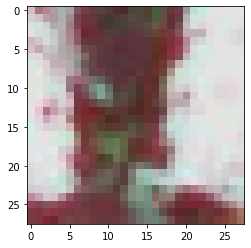

In [0]:
import matplotlib.pyplot as plt
from PIL import Image
def show_imgs(idx,paths):
  print("input image")
  plt.imshow(image.load_img(idx))
  plt.show()
  print("output image")
  for path in paths:
    plt.imshow(image.load_img(path))
    plt.show()

In [0]:
def get_similar(idx,dataframe,k):
  """
  idx: image path for given image
  dataframe: similarity distance matrix
  k: top k of image
  returns k top image paths
  """
  cosine_data = dataframe.loc[idx]
  top_5 = cosine_data.sort_values()[1:k]
  paths = top_5.index.tolist()
  print(paths)
  return paths



In [113]:
inp_img = pd_df.paths.iloc[10]
arr_k=[5,15,50,100,500]
for k in arr_k:
  print("k",k)
  out_img = get_similar(inp_img,similarity_df,k)
  print(calculate_avg_mse(inp_img,out_img))
  print(calculate_avg_ssim(inp_img,out_img))

k 5
['geological_similarity/gneiss/BM289.jpg', 'geological_similarity/gneiss/LDIWC.jpg', 'geological_similarity/gneiss/B74ZD.jpg', 'geological_similarity/gneiss/IS9NX.jpg']
0.14610039604076924
0.2649856191374848
k 15
['geological_similarity/gneiss/BM289.jpg', 'geological_similarity/gneiss/LDIWC.jpg', 'geological_similarity/gneiss/B74ZD.jpg', 'geological_similarity/gneiss/IS9NX.jpg', 'geological_similarity/gneiss/42Q2U.jpg', 'geological_similarity/gneiss/ATJZX.jpg', 'geological_similarity/gneiss/AXBHS.jpg', 'geological_similarity/gneiss/FOJW6.jpg', 'geological_similarity/gneiss/HXRG5.jpg', 'geological_similarity/gneiss/4WM4D.jpg', 'geological_similarity/schist/U5EMS.jpg', 'geological_similarity/gneiss/GLSJL.jpg', 'geological_similarity/gneiss/4RI2D.jpg', 'geological_similarity/gneiss/7N8JV.jpg']
0.21743655025035227
0.18552591009286093
k 50
['geological_similarity/gneiss/BM289.jpg', 'geological_similarity/gneiss/LDIWC.jpg', 'geological_similarity/gneiss/B74ZD.jpg', 'geological_similarity

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


0.17328654165869747
k 500
['geological_similarity/gneiss/BM289.jpg', 'geological_similarity/gneiss/LDIWC.jpg', 'geological_similarity/gneiss/B74ZD.jpg', 'geological_similarity/gneiss/IS9NX.jpg', 'geological_similarity/gneiss/42Q2U.jpg', 'geological_similarity/gneiss/ATJZX.jpg', 'geological_similarity/gneiss/AXBHS.jpg', 'geological_similarity/gneiss/FOJW6.jpg', 'geological_similarity/gneiss/HXRG5.jpg', 'geological_similarity/gneiss/4WM4D.jpg', 'geological_similarity/schist/U5EMS.jpg', 'geological_similarity/gneiss/GLSJL.jpg', 'geological_similarity/gneiss/4RI2D.jpg', 'geological_similarity/gneiss/7N8JV.jpg', 'geological_similarity/gneiss/UXUSG.jpg', 'geological_similarity/gneiss/ZPU2I.jpg', 'geological_similarity/gneiss/OSZ1K.jpg', 'geological_similarity/gneiss/E3WO8.jpg', 'geological_similarity/gneiss/I26ON.jpg', 'geological_similarity/gneiss/529WR.jpg', 'geological_similarity/gneiss/LPUUY.jpg', 'geological_similarity/gneiss/D7FYV.jpg', 'geological_similarity/gneiss/FW7W7.jpg', 'geolog

input image


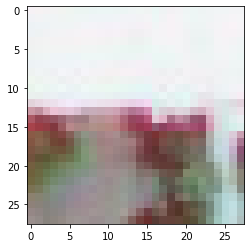

output image


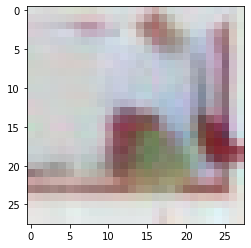

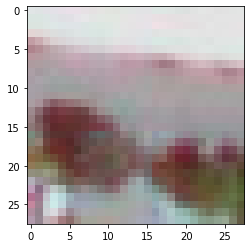

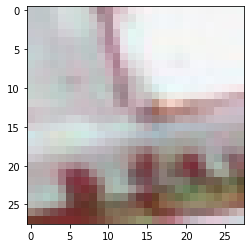

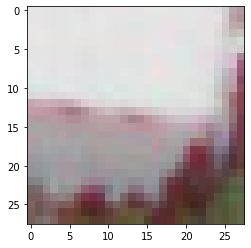

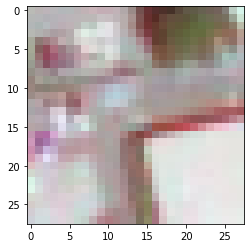

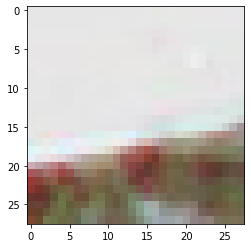

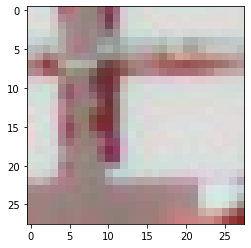

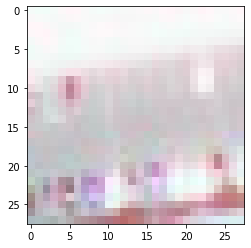

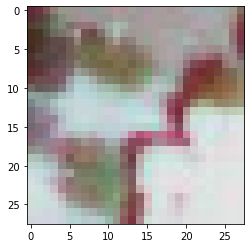

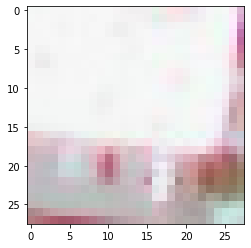

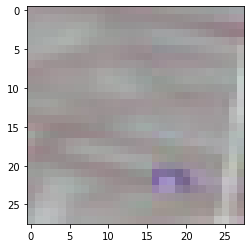

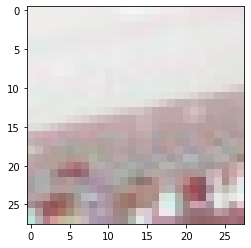

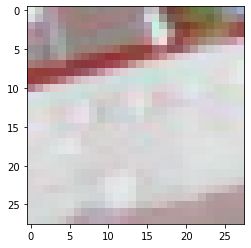

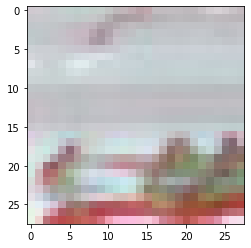

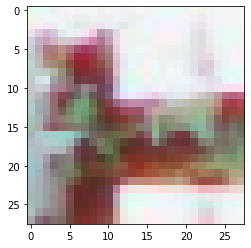

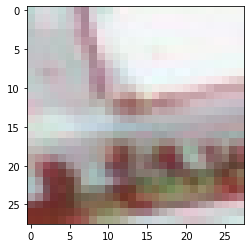

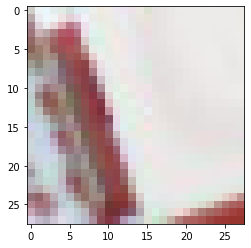

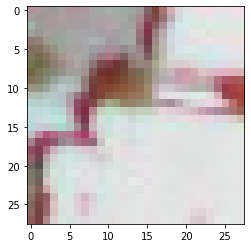

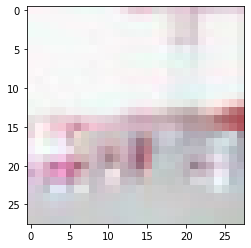

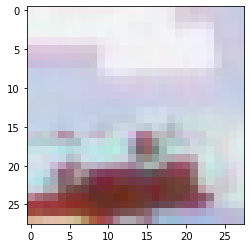

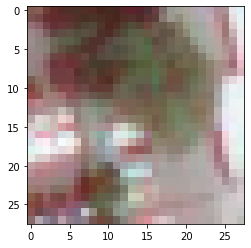

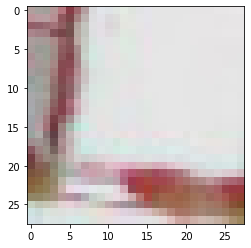

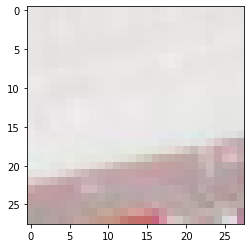

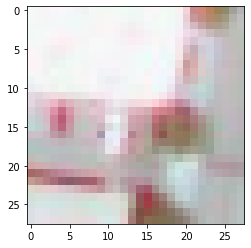

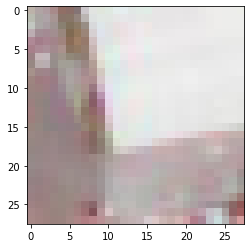

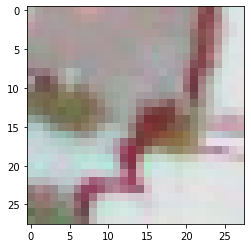

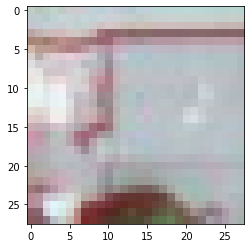

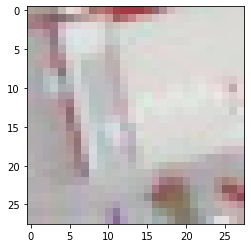

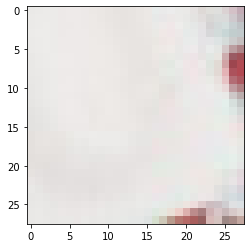

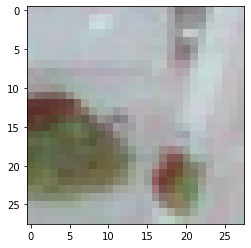

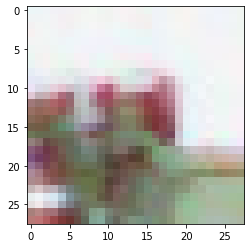

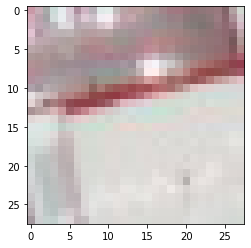

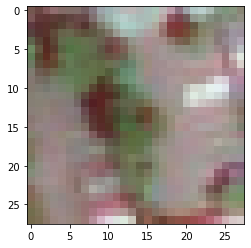

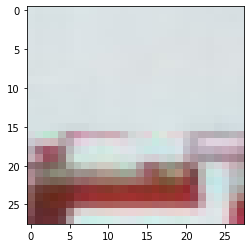

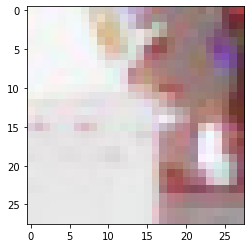

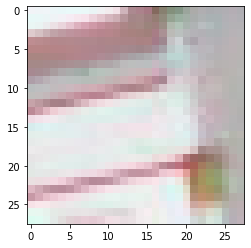

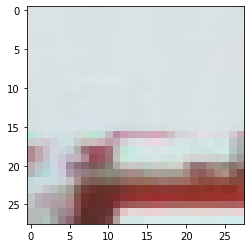

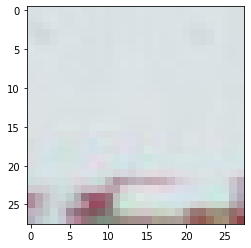

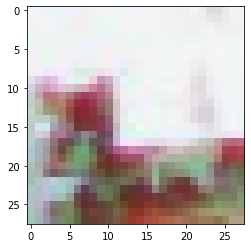

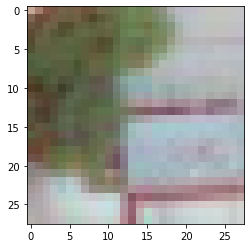

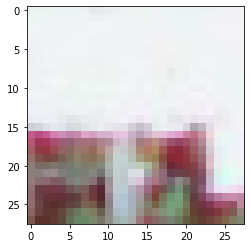

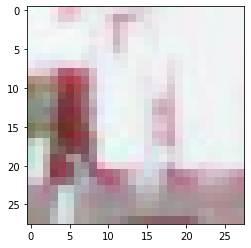

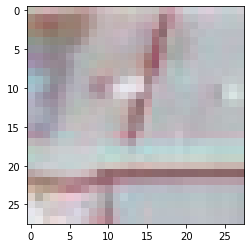

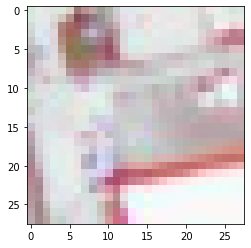

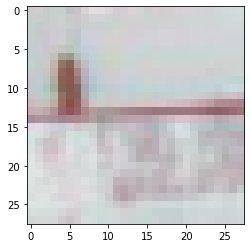

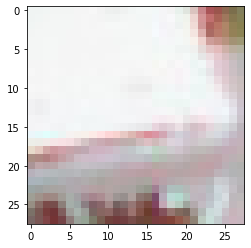

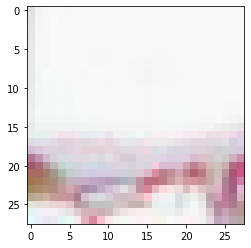

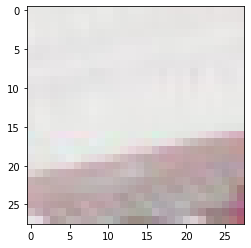

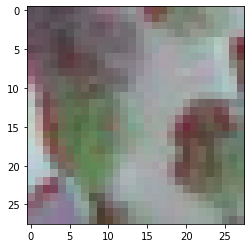

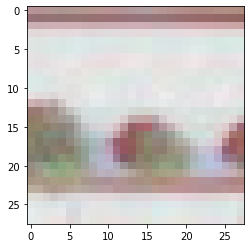

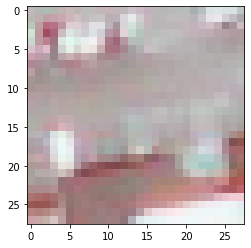

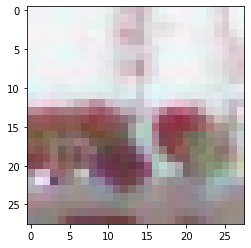

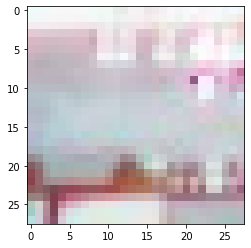

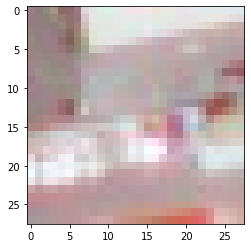

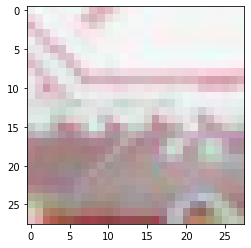

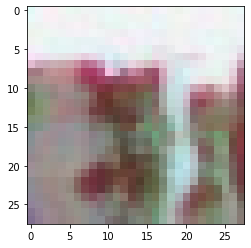

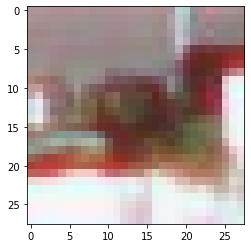

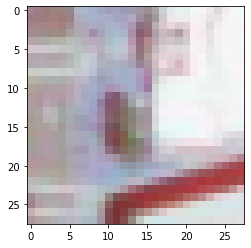

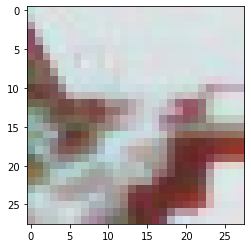

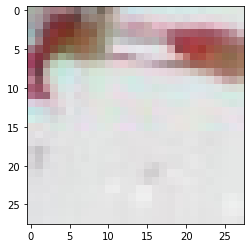

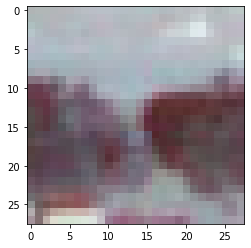

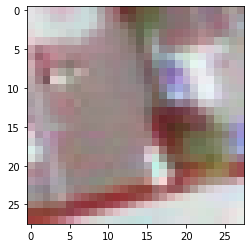

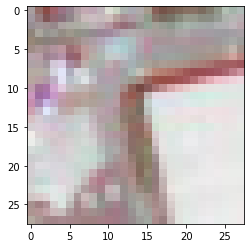

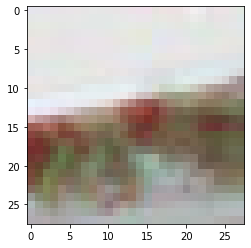

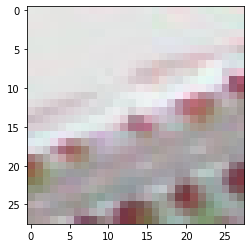

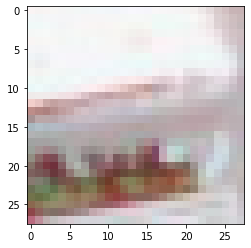

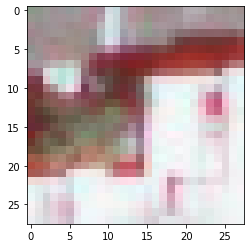

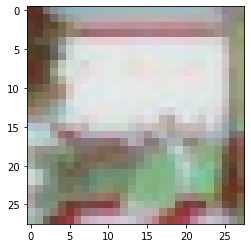

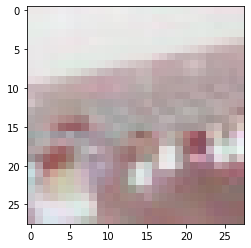

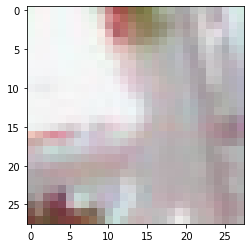

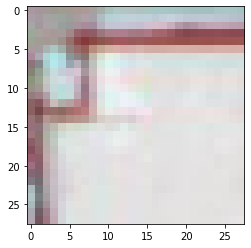

KeyboardInterrupt: ignored

In [115]:
show_imgs(inp_img,out_img)

In [0]:
def calculate_avg_mse(img,contentders):
  img_np = np.array((image.load_img(img)))/255
  total_err = []
  for img_c in contentders:
    img_c_np = np.array((image.load_img(img_c)))/255
    err = np.sum((img_np.astype("float") - img_c_np.astype("float")) ** 2)
    err /= float(img_np.shape[0] * img_np.shape[1])
    total_err.append(err)

  avg_err = (np.mean(total_err))
  return avg_err

In [0]:

from skimage.measure import compare_ssim as ssim
def calculate_avg_ssim(img,contentders):
  img_np = np.array((image.load_img(img)))
  total_err = []
  for img_c in contentders:
    img_c_np = np.array((image.load_img(img_c)))
    err = ssim(img_np, img_c_np,multichannel=True)
    total_err.append(err)
  avg_err = (np.mean(total_err))
  return avg_err
  

In [0]:
import skimage


In [87]:
calculate_avg_mse(idx,paths)

0.2853059812160158

In [88]:
calculate_avg_ssim(idx,paths)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


0.08561589702021921